In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('wind turbine life time.xlsx')

In [3]:
start_date = np.zeros(df.shape[0])
end_date = np.zeros(df.shape[0])

for i in range(1977,2017):
    years = list(df[i])
    none_zeros = []
    for index,j in enumerate(years):
        if j > 0:
            none_zeros.append(index)
    for num in none_zeros:
        if start_date[num] == 0:
            start_date[num] = i
            
for i in range(2016,1976,-1):
    years = list(df[i])
    none_zeros = []
    for index,j in enumerate(years):
        if j > 0:
            none_zeros.append(index)
    for num in none_zeros:
        if end_date[num] == 0:
            end_date[num] = i
len(start_date),len(end_date)       

(3306, 3306)

In [4]:
df['Year of start'] = list(start_date)
df['Year of end'] = list(end_date)
df.head()

,Capacity (kW),Rotor diameter (m),Hub height (m),total production,life time,1977,1978,1979,1980,1981,...,2009,2010,2011,2012,2013,2014,2015,2016,Year of start,Year of end
0,10.0,13.0,18.0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,300.0,35.0,35.0,1.164174e+07,NaN,NaN,NaN,NaN,NaN,NaN,...,341225.5,388622.0,358744.5,351972.5,247584.5,439209.15,350204.65,6824.9,1989.0,2016.0
2,300.0,35.0,35.0,1.164174e+07,NaN,NaN,NaN,NaN,NaN,NaN,...,341225.5,388622.0,358744.5,351972.5,247584.5,439209.15,350204.65,6824.9,1989.0,2016.0
3,90.0,18.0,23.0,1.427740e+06,NaN,NaN,NaN,NaN,NaN,NaN,...,91831.0,93290.0,98739.0,37100.0,0.0,NaN,NaN,NaN,1998.0,2012.0
4,22.0,10.0,18.0,2.504650e+05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986.0,2002.0


In [5]:
# Get date of start and end to calculate life time
df_data = df[['Capacity (kW)','Rotor diameter (m)','Hub height (m)','Year of start','Year of end']]
df_data.head()    

,Capacity (kW),Rotor diameter (m),Hub height (m),Year of start,Year of end
0,10.0,13.0,18.0,0.0,0.0
1,300.0,35.0,35.0,1989.0,2016.0
2,300.0,35.0,35.0,1989.0,2016.0
3,90.0,18.0,23.0,1998.0,2012.0
4,22.0,10.0,18.0,1986.0,2002.0


In [6]:
df_data = df_data.dropna()
drop_list = []
for i in df_data.index:
    if df_data.loc[i][0] < 1 or df_data.loc[i][1] < 5 or df_data.loc[i][2] < 5 or df_data.loc[i][3] == 0 or df_data.loc[i][4] == 0:
        drop_list.append(i)
len(drop_list)

401

In [7]:
df_data = df_data.drop(index=drop_list)
df_data['Life time'] = df_data['Year of end']-df_data['Year of start']+1
df_data['bias'] = np.ravel(np.ones((df_data.shape[0],1))) # adding bias
df_data.head()

,Capacity (kW),Rotor diameter (m),Hub height (m),Year of start,Year of end,Life time,bias
1,300.0,35.0,35.0,1989.0,2016.0,28.0,1.0
2,300.0,35.0,35.0,1989.0,2016.0,28.0,1.0
3,90.0,18.0,23.0,1998.0,2012.0,15.0,1.0
4,22.0,10.0,18.0,1986.0,2002.0,17.0,1.0
5,75.0,17.0,23.0,1986.0,2002.0,17.0,1.0


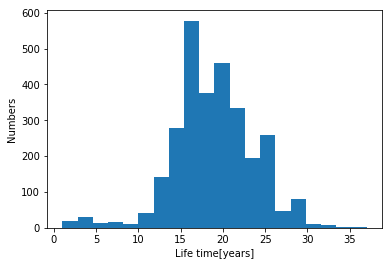

In [8]:
# a general plot to see the distribution of life time
life_time = list(df_data['Life time'])

plt.hist(life_time,20)
plt.xlabel('Life time[years]')
plt.ylabel('Numbers')
plt.show()

In [9]:
df_data['Life time'].mean(),df_data['Life time'].median(),df_data['Life time'].max(),df_data['Life time'].min()

(18.831955922865014, 18.0, 37.0, 1.0)

In [10]:
# By using linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
X = df_data.values.copy()
y = X[:,4]
x = X[:,[0,1,2,3]]
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [12]:
regr = LinearRegression()
regr.fit(x_train,y_train)
y_pred_LR = regr.predict(x_test)

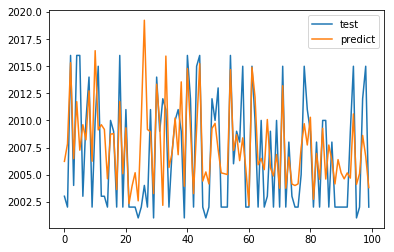

Text(0, 0.5, 'predict')

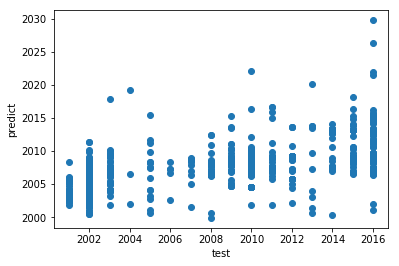

In [13]:
# plot the test dataset with the predicted one
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_LR[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_LR)
plt.xlabel('test')
plt.ylabel('predict')

In [14]:
from sklearn import metrics
#Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
print(MAE_LR, MSE_LR, RMSE_LR)

3.511889588438391 18.883472687282136 4.345511786577289


In [15]:
regr.score(x_train, y_train),regr.score(x_test, y_test),regr.coef_

(0.42369668628252966,
 0.3595932310905845,
 array([-0.007234  ,  0.27622006,  0.01313114,  0.47783941]))

In [16]:
# plot the learning curve to see how the model performs
from sklearn.model_selection import learning_curve

In [17]:
train_sizes, train_scores, valid_scores = learning_curve(regr, x, y, train_sizes=np.linspace(0.1, 1.0, 20),cv = 5)#,scoring = 'neg_mean_squared_error')

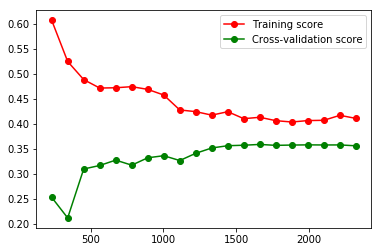

In [18]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [19]:
# adding more features by PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

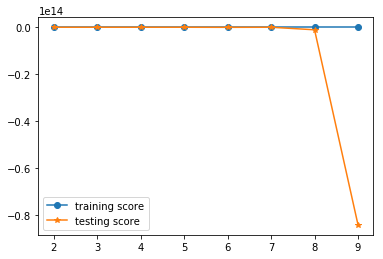

In [20]:
X = df_data.values.copy()
x_p = X[:,[0,1,2,3]]
y_lt = X[:,[4]]
train_scores = []
test_scores = []
for i in range(2,10):
    poly = PolynomialFeatures(i)
    x_prime = poly.fit_transform(x_p)
    x_train, x_test, y_train, y_test = train_test_split(x_prime,y_lt)
    regr = LinearRegression()
    regr.fit(x_train,y_train)
    train_scores.append(regr.score(x_train,y_train))
    test_scores.append(regr.score(x_test,y_test))
    
plt.plot(range(2,10),train_scores,'o-',label = 'training score')
plt.plot(range(2,10),test_scores,'*-',label = 'testing score')
plt.legend()
plt.show() 

In [21]:
train_scores,test_scores

([0.45788978472964426,
  0.49619915782653523,
  0.4171256981985906,
  0.5421196346881791,
  0.5527962383850057,
  0.5192520084630492,
  0.5589013861103336,
  0.5537451664830755],
 [0.44950571952729407,
  -2.366604031185852,
  -4.224322870705136,
  -77.16590752750054,
  -36842818354.71322,
  -758537506.1451023,
  -1084915538740.7821,
  -84376235059298.34])

0.45192232782127284 0.4711073404597902


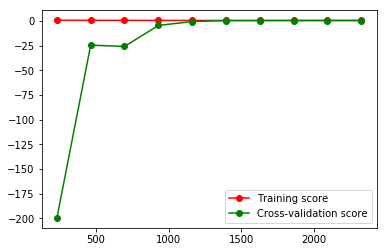

In [22]:
X = df_data.values.copy()
x_p = X[:,[0,1,2,3]]
y_r = X[:,[4]]
poly = PolynomialFeatures(2)
x_prime = poly.fit_transform(x_p)
x_train, x_test, y_train, y_test = train_test_split(x_prime,y_r)
regr = LinearRegression()
regr.fit(x_train,y_train)
print(regr.score(x_train, y_train),regr.score(x_test, y_test))

train_sizes, train_scores, valid_scores = learning_curve(regr, x_prime, y_r, train_sizes=np.linspace(0.1, 1.0, 10),cv = 5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [23]:
# By using Random Forest
from sklearn.ensemble import RandomForestRegressor


parameters = {'bootstrap': True,
              'min_samples_leaf': 8,
              'n_estimators': 600, # change the number of trees
              'min_samples_split': 12,
              'max_features': 'sqrt',
              'max_depth': 10,
              'max_leaf_nodes': None}

RF_model = RandomForestRegressor(**parameters)
RF_model.fit(x_train, np.ravel(y_train))
y_pred_RF = RF_model.predict(x_test)

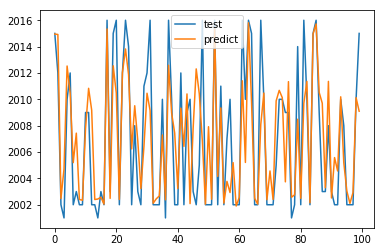

Text(0, 0.5, 'predict')

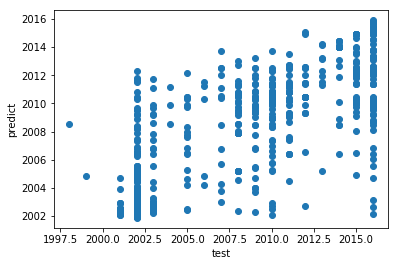

In [24]:
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_RF[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_RF)
plt.xlabel('test')
plt.ylabel('predict')

In [25]:
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
print(MAE_RF,MSE_RF,RMSE_RF)

2.1839850868134016 10.412658300210806 3.226865088628715


In [26]:
RF_model.score(x_train, y_train),RF_model.score(x_test, y_test)

(0.6729849252359705, 0.6487947518927151)

In [27]:
end_year = RF_model.predict(x_prime)
end_ = [round(i) for i in end_year]

In [28]:
life_time = end_ - df_data['Year of start']+1

In [29]:
mask = life_time > 0

In [30]:
len(life_time[mask])

2892

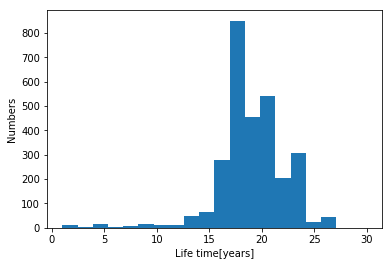

In [31]:
plt.hist(life_time[mask],20)
plt.xlabel('Life time[years]')
plt.ylabel('Numbers')
plt.show()

In [32]:
life_time[mask].mean(),life_time[mask].median(),life_time[mask].max(),life_time[mask].min()

(18.889004149377595, 19.0, 30.0, 1.0)

In [33]:
np.ravel(y_r)-list(df_data['Year of start'])

array([27., 27., 14., ..., 26., 26.,  1.])

In [34]:
MAE_RF=metrics.mean_absolute_error(np.ravel(y_r)-list(df_data['Year of start']),life_time) 
MSE_RF=metrics.mean_squared_error(np.ravel(y_r)-list(df_data['Year of start']),life_time)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(np.ravel(y_r)-list(df_data['Year of start']),life_time))
print(MAE_RF,MSE_RF,RMSE_RF)

2.49896694214876 11.017561983471074 3.3192713030831142


In [35]:
# by using SVR
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=200, gamma=0.01, epsilon=.01)

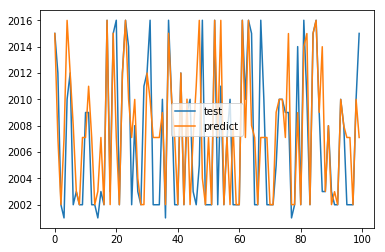

Text(0, 0.5, 'predict')

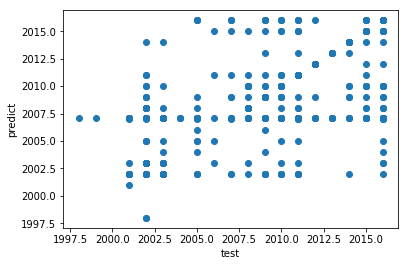

In [36]:
svr_rbf.fit(x_train,np.ravel(y_train))
y_pred_svr_rbf = svr_rbf.predict(x_test)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_svr_rbf[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_svr_rbf)
plt.xlabel('test')
plt.ylabel('predict')

In [37]:
MAE_SVR1=metrics.mean_absolute_error(y_test,y_pred_svr_rbf) 
MSE_SVR1=metrics.mean_squared_error(y_test,y_pred_svr_rbf)  
RMSE_SVR1= np.sqrt(metrics.mean_squared_error(y_test,y_pred_svr_rbf))
print(MAE_SVR1,MSE_SVR1,RMSE_SVR1)

2.3540176952849805 14.745873051228783 3.8400355533808255


In [38]:
svr_rbf.score(x_train,y_train),svr_rbf.score(x_test,y_test)

(0.7689734931827141, 0.5026411263864785)

In [40]:
# feature extraction, adding new features

df_data['P_sqrt'] = df_data['Capacity (kW)']**0.5
df_data['1/P'] = 1/df_data['Capacity (kW)']
df_data['P_log'] = np.log(list(df_data['Capacity (kW)']))
df_data['R_sqrt'] = df_data['Rotor diameter (m)']**0.5
df_data['1/R'] = 1/df_data['Rotor diameter (m)']
df_data['R_log'] = np.log(list(df_data['Rotor diameter (m)']))
df_data['R/h'] = df_data['Rotor diameter (m)']/df_data['Hub height (m)']
df_data['Start/1000'] = df_data['Year of start']/1000
df_data['exp(R/h)'] = np.exp(df_data['R/h'])
#df_data['P_square'] = df_data['Capacity (kW)']**2
df_data = df_data.dropna()
df_data.head()

,Capacity (kW),Rotor diameter (m),Hub height (m),Year of start,Year of end,Life time,bias,P_sqrt,1/P,P_log,R_sqrt,1/R,R_log,R/h,Start/1000,exp(R/h)
1,300.0,35.0,35.0,1989.0,2016.0,28.0,1.0,17.320508,0.003333,5.703782,5.916080,0.028571,3.555348,1.000000,1.989,2.718282
2,300.0,35.0,35.0,1989.0,2016.0,28.0,1.0,17.320508,0.003333,5.703782,5.916080,0.028571,3.555348,1.000000,1.989,2.718282
3,90.0,18.0,23.0,1998.0,2012.0,15.0,1.0,9.486833,0.011111,4.499810,4.242641,0.055556,2.890372,0.782609,1.998,2.187170
4,22.0,10.0,18.0,1986.0,2002.0,17.0,1.0,4.690416,0.045455,3.091042,3.162278,0.100000,2.302585,0.555556,1.986,1.742909
5,75.0,17.0,23.0,1986.0,2002.0,17.0,1.0,8.660254,0.013333,4.317488,4.123106,0.058824,2.833213,0.739130,1.986,2.094114


In [41]:
# feature selection
from sklearn.ensemble import ExtraTreesRegressor
X = df_data.values.copy()
y = X[:,4]
x = X[:,[0,1,2,3,6,7,8,9,10,11,12,13,14,15]]
model = ExtraTreesRegressor()
model.fit(x, y)
print(model.feature_importances_)

[0.05863773 0.06571465 0.07383477 0.11232208 0.         0.04814824
 0.09499415 0.04705389 0.06015658 0.09418221 0.02770453 0.09176882
 0.1815393  0.04394306]


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [42]:
from sklearn.feature_selection import RFE
model=LinearRegression() # LinearRegression Model as Estimator

#model = RandomForestRegressor()
rfe=RFE(model,4)# using 4 features

fit=rfe.fit(x,y)
print( "Feature Ranking(liner): %s" % (fit.ranking_))

Feature Ranking(liner): [ 9  5  7  6 11  8  1  4  1  1  1  2 10  3]


In [43]:
X = df_data.values.copy()
y = X[:,4]
x = X[:,[1,3,10,11,12,14]] # using all the features
x_train, x_test, y_train, y_test = train_test_split(x,y)

regr = LinearRegression()
regr.fit(x_train,y_train)
y_pred_LR = regr.predict(x_test)

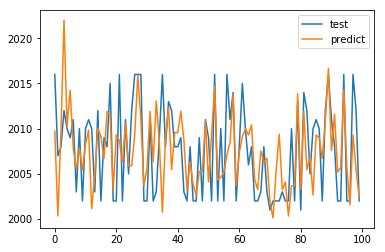

Text(0, 0.5, 'predict')

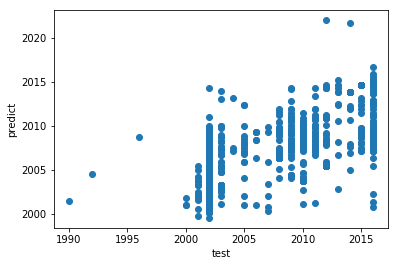

In [44]:
# plot the test dataset with the predicted one
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_LR[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_LR)
plt.xlabel('test')
plt.ylabel('predict')

In [45]:
#Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
print(MAE_LR, MSE_LR, RMSE_LR)

3.148555844037832 16.542124645649587 4.067201082519721


In [46]:
regr.score(x_train,y_train),regr.score(x_test,y_test)

(0.482109189995399, 0.44047099947105356)

In [47]:
# By using Random Forest
from sklearn.ensemble import RandomForestRegressor
parameters = {'bootstrap': True,
              'min_samples_leaf': 8,
              'n_estimators': 600, # change the number of trees
              'min_samples_split': 12,
              'max_features': 'sqrt',
              'max_depth': 10,
              'max_leaf_nodes': None}

RF_model = RandomForestRegressor(**parameters)
RF_model.fit(x_train, y_train)
y_pred_RF = RF_model.predict(x_test)

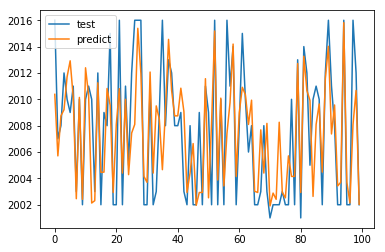

Text(0, 0.5, 'predict')

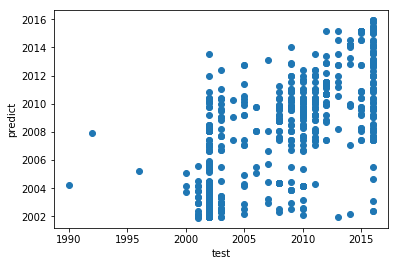

In [48]:
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_RF[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_RF)
plt.xlabel('test')
plt.ylabel('predict')

In [49]:
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
print(MAE_RF,MSE_RF,RMSE_RF)

2.535626755961294 13.177949544642095 3.630144562499143


In [50]:
RF_model.score(x_train, y_train),RF_model.score(x_test, y_test)

(0.6031855528310677, 0.5542625209468712)

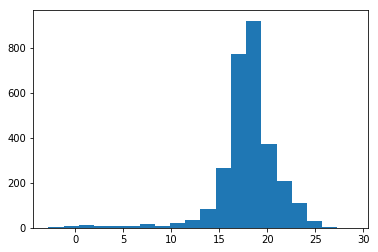

In [51]:
y_pred = RF_model.predict(x)
lf = y_pred - df_data['Year of start']
plt.hist(lf,20)
plt.show()

In [52]:
lf.mean(),lf.median()

(17.85435676225689, 18.075663286771487)

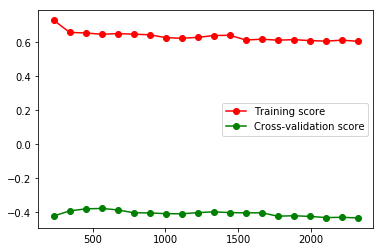

In [53]:
train_sizes, train_scores, valid_scores = learning_curve(RF_model, x, y, train_sizes=np.linspace(0.1, 1.0, 20),cv = 5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, -test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

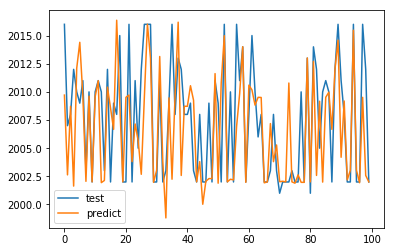

Text(0, 0.5, 'predict')

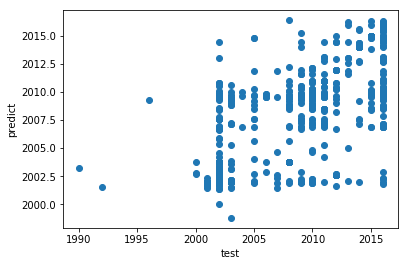

In [55]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.01, epsilon=.01)
svr_rbf.fit(x_train,np.ravel(y_train))
y_pred_svr_rbf = svr_rbf.predict(x_test)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_svr_rbf[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_svr_rbf)
plt.xlabel('test')
plt.ylabel('predict')

In [56]:
MAE_SVR1=metrics.mean_absolute_error(y_test,y_pred_svr_rbf) 
MSE_SVR1=metrics.mean_squared_error(y_test,y_pred_svr_rbf)  
RMSE_SVR1= np.sqrt(metrics.mean_squared_error(y_test,y_pred_svr_rbf))
print(MAE_SVR1,MSE_SVR1,RMSE_SVR1)
svr_rbf.score(x_train,y_train),svr_rbf.score(x_test,y_test)

2.6063933756421016 16.25866979633241 4.032204086641996


(0.5178758501720829, 0.4500587164016736)

In [57]:
# by Neural network
from sklearn.neural_network import MLPRegressor

parameters={ 'solver':'adam', 
            'activation':'relu',
            'alpha':1e-4,
            'hidden_layer_sizes': (10,10), 
            'random_state':1,
            'max_iter':500,
            'verbose':10,
            'learning_rate_init':.1}
mlp = MLPRegressor(**parameters) 
#mlp=MLPClassifier() # another way

#mlp = MLPRegressor(hidden_layer_sizes = (10,20)) # number of hidden layers
mlp.fit(x_train,np.ravel(y_train))
y_pred_NN = mlp.predict(x_test)


Iteration 1, loss = 252810.86889650
Iteration 2, loss = 34681.73209553
Iteration 3, loss = 5390.65523547
Iteration 4, loss = 1880.51507745
Iteration 5, loss = 621.43173679
Iteration 6, loss = 220.86499596
Iteration 7, loss = 103.64105798
Iteration 8, loss = 37.13659319
Iteration 9, loss = 23.78329506
Iteration 10, loss = 18.33086190
Iteration 11, loss = 16.21828718
Iteration 12, loss = 15.03518241
Iteration 13, loss = 14.02324648
Iteration 14, loss = 13.43440523
Iteration 15, loss = 13.17295045
Iteration 16, loss = 12.45993110
Iteration 17, loss = 12.34866819
Iteration 18, loss = 11.97808802
Iteration 19, loss = 11.62735782
Iteration 20, loss = 11.40555521
Iteration 21, loss = 11.73273777
Iteration 22, loss = 11.11754423
Iteration 23, loss = 10.93565256
Iteration 24, loss = 10.90040274
Iteration 25, loss = 11.18379756
Iteration 26, loss = 10.97847236
Iteration 27, loss = 10.71919917
Iteration 28, loss = 10.75256937
Iteration 29, loss = 10.67793142
Iteration 30, loss = 10.64168733
Itera

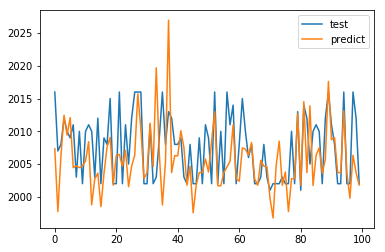

Text(0, 0.5, 'predict')

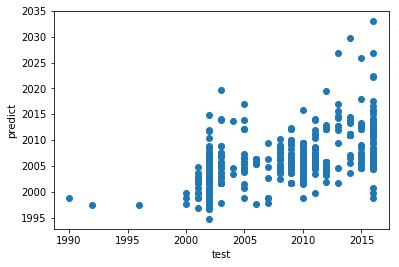

In [58]:

plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_NN[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_NN)
plt.xlabel('test')
plt.ylabel('predict')

In [59]:
MAE_NN=metrics.mean_absolute_error(y_test,y_pred_NN) 
MSE_NN=metrics.mean_squared_error(y_test,y_pred_NN)  
RMSE_NN= np.sqrt(metrics.mean_squared_error(y_test,y_pred_NN))
print(MAE_NN,MSE_NN,RMSE_NN)

mlp.score(x_train,y_train),mlp.score(x_test,y_test)

3.724488701831265 24.159173995650487 4.915198266158801


(0.22119144590509343, 0.18282815726779877)